In [1]:
from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import SGN, DM, DMCoral, GatedDM, DM_SDA

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, pl.__version__, device)

2.0.1 2.0.4 cuda:0


DM_SDA
Started training for  DM_SDA
Joint training for  DM_SDA
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
Dropping missing values
Train Jointly
Loading building ...  5
Dropping missing values
Train Jointly
Doing Preprocessing
Train df <class 'list'>
Train main (154801, 720, 1)


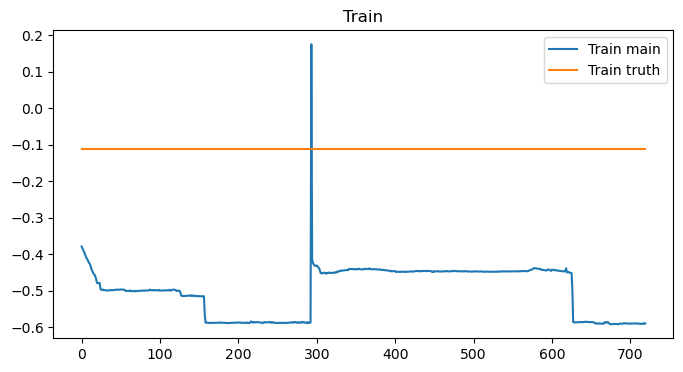

First model training for microwave
Is Time embed used ?  True
Cuda avail True GPU dataset True
Main shape (154801, 720, 1)
App shape (154801, 720, 1)
Started epoch 0
Epoch: 0, Valid_Loss: 0.020665526390075684, Time consumption: 428.08415508270264s.
Started epoch 1
Epoch: 1, Valid_Loss: 0.0133627038449049, Time consumption: 433.6985855102539s.
Started epoch 2
Epoch: 2, Valid_Loss: 0.008503894321620464, Time consumption: 436.2047622203827s.
Started epoch 3
Epoch: 3, Valid_Loss: 0.00679467199370265, Time consumption: 436.63941049575806s.
Started epoch 4
Epoch: 4, Valid_Loss: 0.006507305894047022, Time consumption: 436.9946632385254s.
Started epoch 5
Epoch: 5, Valid_Loss: 0.004588513635098934, Time consumption: 437.03081464767456s.
Started epoch 6
Epoch: 6, Valid_Loss: 0.0039047219324856997, Time consumption: 437.03573966026306s.
Started epoch 7
Epoch: 7, Valid_Loss: 0.0043058921582996845, Time consumption: 437.0014042854309s.
Started epoch 8
Epoch: 8, Valid_Loss: 0.0040242113173007965, Ti

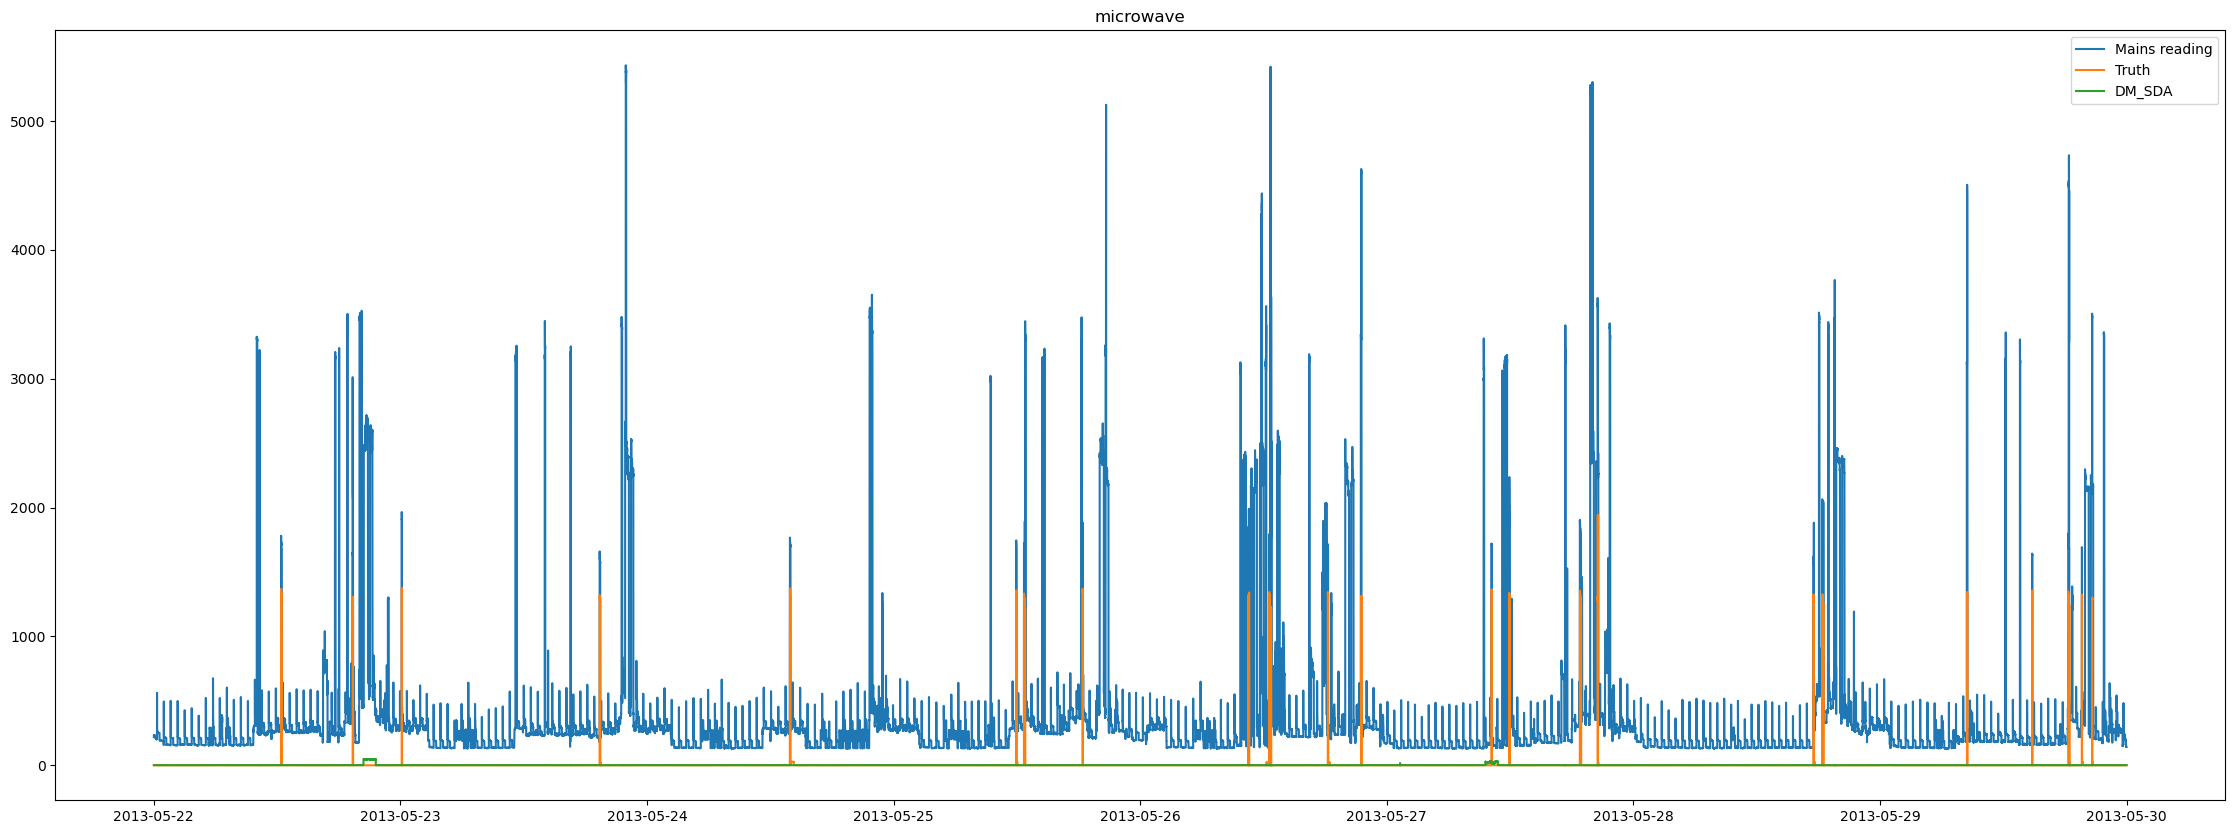

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        # 'mains': ['active'],
        # 'appliance': ['active']
        'mains': ['apparent'],  # problem: ukdale active, redd apparent
        'appliance': ['active']
    },
    'sample_rate': 6,
    # 'appliances': ['fridge'],
    'appliances': ['microwave'],
    # Universally no pre-training
    'pre_trained': False,
    # Specify algorithm hyper-parameters
    # 'methods': {"DMCoral": DMCoral(
    #     {'n_epochs': 40, 'batch_size': 64, 'sequence_length': 480, 'overlapping_step': 120,
    #      'test_only': True, 'uda': True, 'lambda_coral': 0.5})},
    # 'methods': {"GatedDM": GatedDM(
    #     {'n_epochs': 50, 'batch_size': 64, 'sequence_length': 900, 'appliance_length': 120, 'overlapping_step': 12,
    #      'test_only': True})},
    'methods': {"DM_SDA": DM_SDA(
        {'n_epochs': 30, 'batch_size': 64, 'sequence_length': 720, 'overlapping_step': 60,
         'test_only': False, 'sda': False, 'fine_tune': False, 'src_rate': 0.5, 'lr': 1e-4, 
         "sampler": "ddim", "gpu_dataset": True})},
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    1: {
                        'start_time': '2013-05-31',
                        'end_time': '2014-12-31'
                    },
                    # 2: {
                    #     'start_time': '2013-05-22',
                    #     'end_time': '2013-08-01'
                    # },
                    5: {
                        'start_time': '2014-07-01',
                        'end_time': '2014-09-05'
                    },
                }
            },
        }
    },
    'transfer': {
        'datasets': {
            # 'redd': {
            #     'path': 'mnt/redd.h5',
            #     'buildings': {
            #         # 1: {
            #         #     'start_time': '2011-04-19',
            #         #     'end_time': '2011-05-04'
            #         # }
            #         2: {
            #             'start_time': '2011-04-18',
            #             'end_time': '2011-04-25'
            #         }
            #     }
            # },
            # 'ukdale': {
            #   'path': 'mnt/ukdale.h5',
            #   'buildings': {
            #         1: {
            #               'start_time': '2013-05-01 00:00',
            #               'end_time': '2013-05-14 00:00'
            #         }
            #     }
            #   },
        },
    },
    'test': {
        'datasets': {
            'ukdale': {
              'path': 'mnt/ukdale.h5',
              'buildings': {
                    2: {
                          'start_time': '2013-05-22 00:00',
                        #   'end_time': '2013-08-01 00:00'
                          'end_time': '2013-05-30 00:00'
                    }
                }
              },
            # 'redd': {
            #     'path': 'mnt/redd.h5',
            #     'buildings': {
            #         2: {
            #             'start_time': '2011-04-26',
            #             'end_time': '2011-04-30'
            #         }
            #     }
                # 'buildings': {
                #     2: {
                #         'start_time': '2011-05-05',
                #         'end_time': '2011-05-22'
                #     }
                # }
        },
        # Specify evaluation metrics
        'metrics': ['mae', 'accuracy', 'f1score', 'recall', 'precision', 'nep', 'omae', 'MCC']
    }
}

API(e)